# Effect of ARID1A mutation on interacting protein abundance and phosphorylation levels

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [2]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
trans = CPTAC.get_transcriptomics()

## effect of ARID1A mutation on interacting protein abundance in tumor patients

In [3]:
protList = ['RUNX1','AKT1','BAD','DPF2','EZH2','TP53','ARID1B','BAF250B','SMARCA4','BRG1','BAF190A','SMARCA2','BRM','BAF190B','SMARCE1','ACTL6A','BAF53','SMARCC1','BAF155','SMARCC2','BAF170','SMARCB1','SNF5','BAF47','PHF10','SMARCA1','SMARCD1','SMARCD2']
pcutoff = 0.05/ len(protList)
gene = 'ARID1A'

proteomics = proteomics[:100]

#print(proteomics['EZH2'])

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        #cross = cross.loc[cross["Patient_Type"]=="Tumor"]
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] != "Wildtype"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

Test for DPF2: 
Ttest_indResult(statistic=-6.081953553481341, pvalue=2.2948807467387887e-08)
Test for SMARCE1: 
Ttest_indResult(statistic=-4.130078363004059, pvalue=7.634934239543734e-05)
Test for SMARCC2: 
Ttest_indResult(statistic=-4.048439830624606, pvalue=0.00010309944017513439)
Test for SMARCB1: 
Ttest_indResult(statistic=-4.518437769374729, pvalue=1.7419120367050688e-05)
Test for SMARCD1: 
Ttest_indResult(statistic=-3.8723121521655464, pvalue=0.00019459950889299838)


### Plot significant results from interacting proteins

Test for DPF2: 
Ttest_indResult(statistic=-6.081953553481341, pvalue=2.2948807467387887e-08)


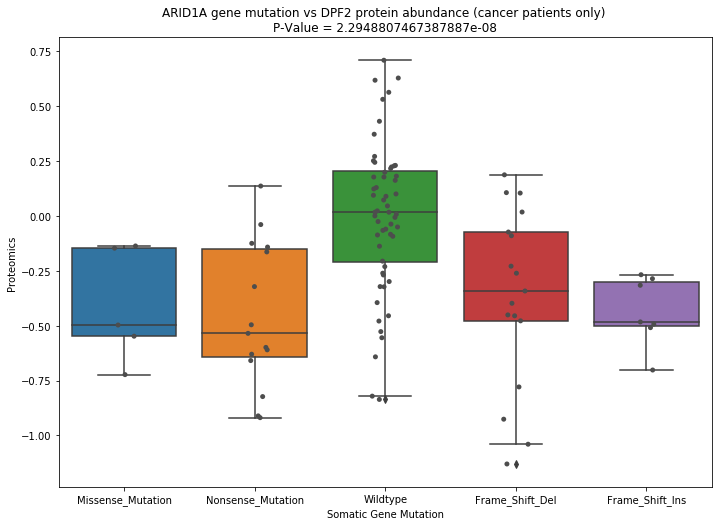

In [4]:
gene = 'ARID1A'
protein = 'DPF2'
cross = CPTAC.compare_mutations(proteomics, protein, gene)
cross = cross[["Mutation", protein]].dropna(axis=0)
mutated = cross.loc[cross["Mutation"] != "Wildtype"]
wt = cross.loc[cross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
if(ttest[1] <= pcutoff):
    sigResults.append(protein)
    print("Test for " + protein + ": ")
    print(ttest) 
    
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=protein, ax = ax)
somatic_boxplot.set_title("ARID1A gene mutation vs " +protein + " protein abundance (cancer patients only) \nP-Value = " + str(ttest[1]))
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

Test for SMARCC2: 
Ttest_indResult(statistic=-4.048439830624606, pvalue=0.00010309944017513439)


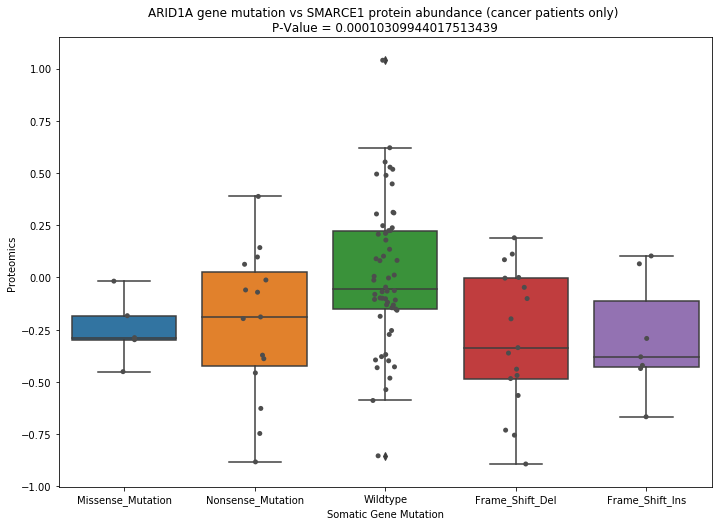

In [5]:
gene = 'ARID1A'
protein = 'SMARCC2'
cross = CPTAC.compare_mutations(proteomics, protein, gene)
cross = cross[["Mutation", protein]].dropna(axis=0)
mutated = cross.loc[cross["Mutation"] != "Wildtype"]
wt = cross.loc[cross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
if(ttest[1] <= pcutoff):
    sigResults.append(protein)
    print("Test for " + protein + ": ")
    print(ttest) 
    
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=protein, ax = ax)
somatic_boxplot.set_title("ARID1A gene mutation vs SMARCE1 protein abundance (cancer patients only) \nP-Value = " + str(ttest[1]))
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

Test for SMARCB1: 
Ttest_indResult(statistic=-4.518437769374729, pvalue=1.7419120367050688e-05)


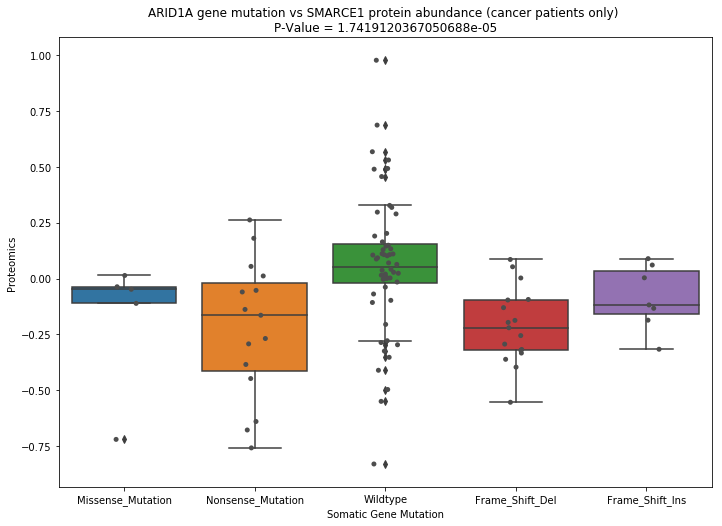

In [6]:
gene = 'ARID1A'
protein = 'SMARCB1'
cross = CPTAC.compare_mutations(proteomics, protein, gene)
cross = cross[["Mutation", protein]].dropna(axis=0)
mutated = cross.loc[cross["Mutation"] != "Wildtype"]
wt = cross.loc[cross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
if(ttest[1] <= pcutoff):
    sigResults.append(protein)
    print("Test for " + protein + ": ")
    print(ttest) 
    
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=protein, ax = ax)
somatic_boxplot.set_title("ARID1A gene mutation vs SMARCE1 protein abundance (cancer patients only) \nP-Value = " + str(ttest[1]))
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

Test for SMARCD1: 
Ttest_indResult(statistic=-3.8723121521655464, pvalue=0.00019459950889299838)


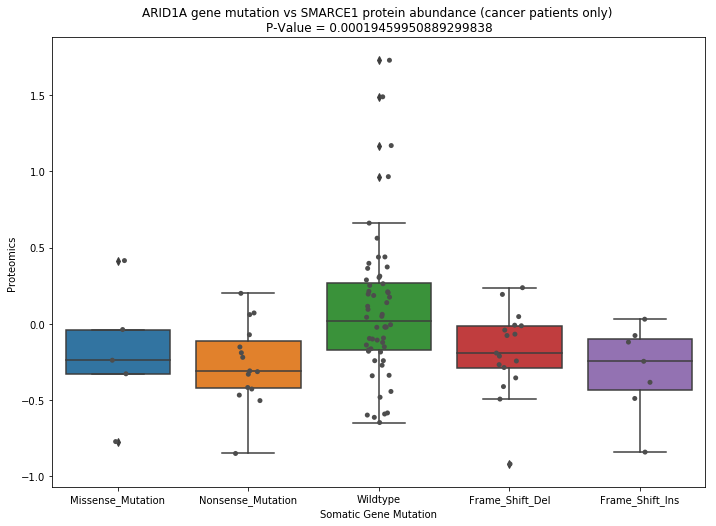

In [7]:
gene = 'ARID1A'
protein = 'SMARCD1'
cross = CPTAC.compare_mutations(proteomics, protein, gene)
cross = cross[["Mutation", protein]].dropna(axis=0)
mutated = cross.loc[cross["Mutation"] != "Wildtype"]
wt = cross.loc[cross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
if(ttest[1] <= pcutoff):
    sigResults.append(protein)
    print("Test for " + protein + ": ")
    print(ttest) 
    
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=protein, ax = ax)
somatic_boxplot.set_title("ARID1A gene mutation vs SMARCE1 protein abundance (cancer patients only) \nP-Value = " + str(ttest[1]))
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

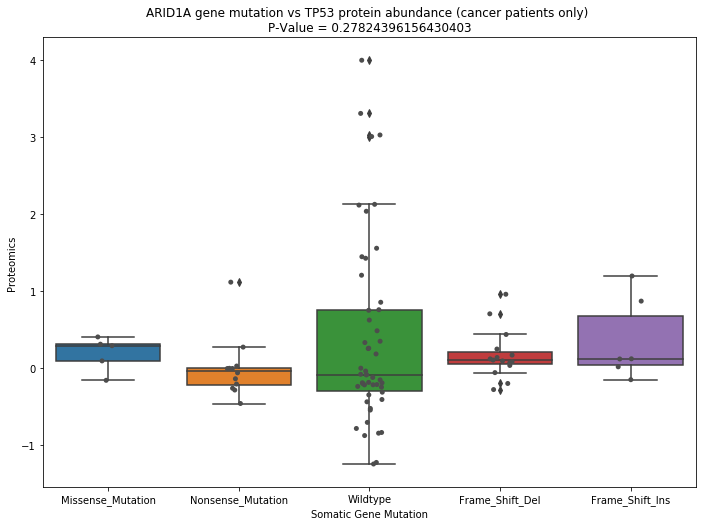

In [8]:
gene = 'ARID1A'
protein = 'TP53'
cross = CPTAC.compare_mutations(proteomics, protein, gene)
cross = cross[["Mutation", protein]].dropna(axis=0)
mutated = cross.loc[cross["Mutation"] != "Wildtype"]
wt = cross.loc[cross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
if(ttest[1] <= pcutoff):
    sigResults.append(protein)
    print("Test for " + protein + ": ")
    print(ttest) 
    
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=protein, ax = ax)
somatic_boxplot.set_title("ARID1A gene mutation vs " + protein + " protein abundance (cancer patients only) \nP-Value = " + str(ttest[1]))
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

## Look at Phoshorylation levels


In [9]:
phosProtList = ['RUNX1','AKT1','BAD','DPF2','EZH2','TP53','ARID1B','BAF250B','SMARCA4','BRG1','BAF190A','SMARCA2','BRM','BAF190B','SMARCE1','ACTL6A','BAF53','SMARCC1','BAF155','SMARCC2','BAF170','SMARCB1','SNF5','BAF47','PHF10','SMARCA1','SMARCD1','SMARCD2']
#phosProtList = ['SMARCB1','SMARCE1','SMARCD1','SMARCC2']
sites = phos.columns
p_values = []
site_names = []
gene = 'ARID1A'

for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
       
        for site in phosphositesdf.columns:
            #just making sure not to do comparison on mutation column
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                sitedf = sitedf.loc[sitedf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
                #print(sitedf[99:140])
                mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                #if len(mutateddf) > 20:
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                p_values.append(ttest[1])
                site_names.append(site)



#We need to remove all 'nan' p-values and their corresponding site names before passing it in for the fdr correction
indexesToRemove=[]

for index in range(0, len(p_values)):
    if np.isnan(p_values[index]):
        indexesToRemove.append(index)

for rem in range( len(indexesToRemove)-1, -1, -1):
    p_values.pop(indexesToRemove[rem])
    site_names.pop(indexesToRemove[rem])
#p_values and site names have now had all entries removed where the corresponding p-value is 'nan'

print(p_values)
print(site_names)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.8009741057740154, 0.8019580356688945, 0.0018942356665285578, 0.482747891309814, 0.48159611248591044, 0.747962740124687, 7.46909833700474e-05, 0.3516561105661557, 0.008313085848896963, 0.6435142957383769, 0.19275291369281938, 0.7688550151974525, 0.13693838927700708, 0.3370354947558506, 0.01886932170767981, 0.1552267216052321, 0.07908944332435713, 0.2564625544641901, 0.06782089782032527, 0.7976595409918205, 0.9533878185668941, 0.9875232735202952, 0.059861887943001534, 0.6219783064215862, 0.5442380635922753, 0.1252235828134493, 0.08683852569996145, 0.573778424782788, 0.6937644435514105, 0.6165776012614242, 0.6802175368366239, 0.08702417736725337, 0.9599352665477086, 0.4842533066274154, 0.5212060536386414, 0.16386954620821673, 0.5205252302476583, 0.2437918773990492, 0.41752580032415776, 0.640124803398293, 0.6584278675093763, 0.7705438308021317, 0.7827816673762849, 0.836848841641795, 0.11671754825563467, 0.37754712925967293, 0.936624466585877, 0.07729861598830268, 0.574421607491181, 0.60

In [10]:
threshold_pval = .05/len(site_names)
print("threshold_pval: ", threshold_pval)
bonferonni_corrected_pvals = list()
bonferonni_sig_sites = list()
for ind in range(0, len(p_values)):
    if p_values[ind] <= threshold_pval:
        bonferonni_corrected_pvals.append(p_values[ind])
        bonferonni_sig_sites.append(site_names[ind])
        
        
bf_significant_vals = dict(zip(bonferonni_sig_sites, bonferonni_corrected_pvals))

print(bf_significant_vals)

threshold_pval:  0.00010893246187363835
{'RUNX1-S450': 7.46909833700474e-05, 'DPF2-S142': 0.00010287368484078429}


# Transcriptomics 

In [11]:
p_values = []
gene = 'ARID1A'
transList = protList

for protein in transList:
    if protein in trans.columns:
        transdf = CPTAC.compare_mutations(trans, protein, gene)
        transdf = transdf.loc[transdf['Patient_Type'] == 'Tumor']
        mutated = transdf.loc[transdf['Mutation'] != 'Wildtype']
        wt = transdf.loc[transdf['Mutation'] == 'Wildtype']
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

    #print(transdf)


Test for TP53: 
Ttest_indResult(statistic=3.689025963223115, pvalue=0.00037328494313790787)


Test for TP53: 
Ttest_indResult(statistic=3.689025963223115, pvalue=0.00037328494313790787)


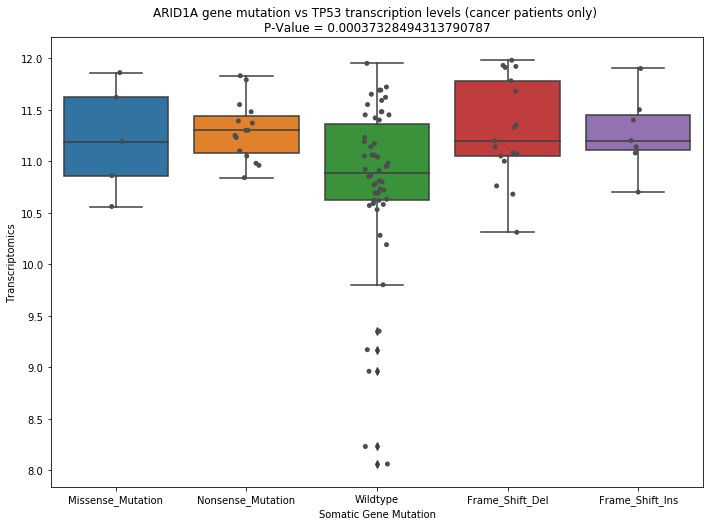

In [12]:
gene = 'ARID1A'
protein = 'TP53'
cross = CPTAC.compare_mutations(trans, protein, gene)
cross = cross.loc[cross["Patient_Type"] == "Tumor"].drop("Patient_Type", axis = 1)
cross = cross[["Mutation", protein]].dropna(axis=0)
mutated = cross.loc[cross["Mutation"] != "Wildtype"]
wt = cross.loc[cross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
if(ttest[1] <= pcutoff):
    sigResults.append(protein)
    print("Test for " + protein + ": ")
    print(ttest) 
    
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=protein, ax = ax)
somatic_boxplot.set_title("ARID1A gene mutation vs " + protein + " transcription levels (cancer patients only) \nP-Value = " + str(ttest[1]))
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Transcriptomics")
plt.show()